In [7]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

Using TensorFlow backend.


In [8]:
print('keras:{}'.format(keras.__version__))

keras:2.3.0


In [10]:
print('Python:{}'.format(sys.version))
print('Pandas:{}'.format(pd.__version__))
print('Numpy:{}'.format(np.__version__))
print('Sklearn:{}'.format(sklearn.__version__))
print('Matplotlib:{}'.format(matplotlib.__version__))

Python:3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas:0.23.0
Numpy:1.17.1
Sklearn:0.19.1
Matplotlib:2.2.2


In [11]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [13]:
#import the dataset
url="http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [14]:
#nomenclature of attributes for our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

In [15]:
#read the csv file
cleveland =pd.read_csv(url, names=names)

In [17]:
#print the shape of DataFrame, to know the number of entities
print('Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [18]:
#print last few data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [128]:
#datacleaning,removing ? fields
data= cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [129]:
#dropping rows with NaN values
data= data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [130]:
#print the shape and datatype of DataFrame
print (data.shape)
print (data.dtypes)


(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [131]:
#transform data to numeric to enable further analysis
data=data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [132]:
#print characteristics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


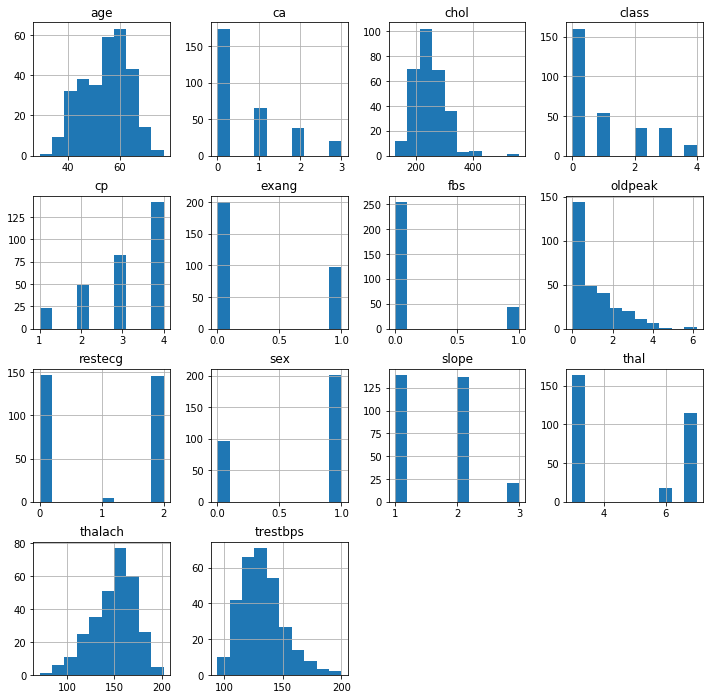

In [145]:
#plot histograms for each variable
data.hist(figsize = (12,12))
plt.show()

In [146]:
#Createing training(80% of total) and testing(20% of total) datasets
from sklearn import model_selection

X=np.array(data.drop(['class'], 1))
y=np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .2)

In [147]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

#Returns binary representation of the presence of heart diseas(1,2,3,4) and no presence (0) 
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [148]:
#building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam


In [157]:
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


model = create_model()
print(model.summary())



Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 8)                 112       
_________________________________________________________________
dense_122 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_123 (Dense)            (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [161]:


# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 284us/step - loss: 0.9235 - accuracy: 0.6076
Epoch 2/100
237/237 [==============================] - 0s 172us/step - loss: 0.8918 - accuracy: 0.6203
Epoch 3/100
237/237 [==============================] - 0s 173us/step - loss: 0.8901 - accuracy: 0.6076
Epoch 4/100
237/237 [==============================] - 0s 163us/step - loss: 0.8968 - accuracy: 0.6118
Epoch 5/100
237/237 [==============================] - 0s 170us/step - loss: 0.9020 - accuracy: 0.6203
Epoch 6/100
237/237 [==============================] - 0s 165us/step - loss: 0.8933 - accuracy: 0.6329
Epoch 7/100
237/237 [==============================] - 0s 176us/step - loss: 0.8919 - accuracy: 0.6329
Epoch 8/100
237/237 [==============================] - 0s 182us/step - loss: 0.8973 - accuracy: 0.6245
Epoch 9/100
237/237 [==============================] - 0s 166us/step - loss: 0.8870 - accuracy: 0.6160
Epoch 10/100
237/237 [==============================] - 0s 288us/step - l

237/237 [==============================] - 0s 169us/step - loss: 0.8789 - accuracy: 0.6287
Epoch 80/100
237/237 [==============================] - 0s 170us/step - loss: 0.8927 - accuracy: 0.6203
Epoch 81/100
237/237 [==============================] - 0s 144us/step - loss: 0.8779 - accuracy: 0.6118
Epoch 82/100
237/237 [==============================] - 0s 142us/step - loss: 0.8848 - accuracy: 0.6203
Epoch 83/100
237/237 [==============================] - 0s 157us/step - loss: 0.8799 - accuracy: 0.6160
Epoch 84/100
237/237 [==============================] - 0s 235us/step - loss: 0.9049 - accuracy: 0.6034
Epoch 85/100
237/237 [==============================] - 0s 150us/step - loss: 0.8793 - accuracy: 0.6203
Epoch 86/100
237/237 [==============================] - 0s 152us/step - loss: 0.8799 - accuracy: 0.6160
Epoch 87/100
237/237 [==============================] - 0s 149us/step - loss: 0.8793 - accuracy: 0.6245
Epoch 88/100
237/237 [==============================] - 0s 142us/step - loss:

In [163]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))


Results for Categorical Model
0.55
             precision    recall  f1-score   support

          0       0.68      1.00      0.81        30
          1       0.33      0.08      0.13        12
          2       0.15      0.29      0.20         7
          3       0.00      0.00      0.00         8
          4       0.00      0.00      0.00         3

avg / total       0.43      0.55      0.46        60



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
